In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

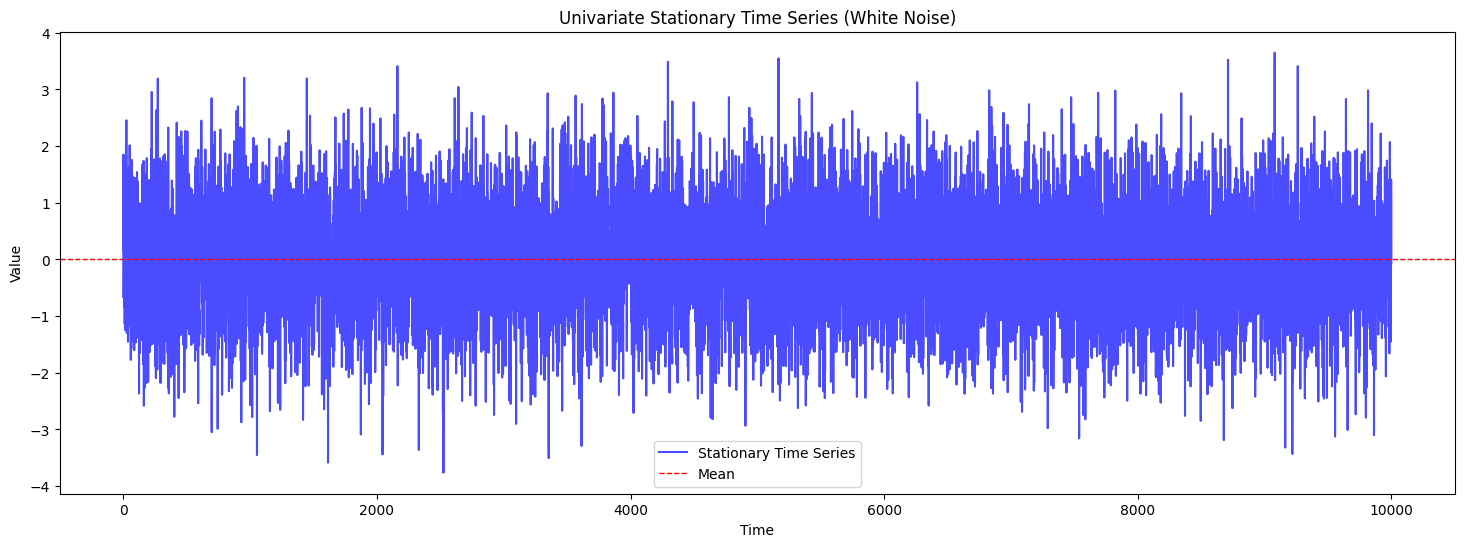

In [4]:
# Generate 10,000 points of white noise
n_points = 10000
time = np.arange(0, n_points)
white_noise = np.random.normal(loc=0, scale=1, size=n_points)

# Create a DataFrame for better handling
stationary_series = pd.DataFrame({'Time': time, 'Value': white_noise})

# Plot the time series
plt.figure(figsize=(18, 6))
plt.plot(stationary_series['Time'], stationary_series['Value'], color='blue', alpha=0.7, label='Stationary Time Series')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Mean')
plt.title("Univariate Stationary Time Series (White Noise)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(white_noise)

# Display the results
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"   {key}: {value}")

# Interpretation
if adf_test[1] < 0.05:
    print("\nThe series is stationary (reject the null hypothesis of a unit root).")
else:
    print("\nThe series is non-stationary (fail to reject the null hypothesis).")


ADF Test Statistic: -36.69301401560862
p-value: 0.0
Critical Values:
   1%: -3.4310046217713728
   5%: -2.861829303857089
   10%: -2.5669239913055346

The series is stationary (reject the null hypothesis of a unit root).


In [38]:
df = pd.read_csv('data.csv')

In [40]:
cols =['record_ID','sku_id', 
       'is_featured_sku', 'is_display_sku']
df.drop(cols, axis=1, inplace=True)

In [41]:
df.head(10)

,week,store_id,total_price,base_price,units_sold
0,17/01/11,8091,99.0375,111.8625,20
1,17/01/11,8091,99.0375,99.0375,28
2,17/01/11,8091,133.9500,133.9500,19
3,17/01/11,8091,133.9500,133.9500,44
4,17/01/11,8091,141.0750,141.0750,52
5,17/01/11,8091,227.2875,227.2875,18
6,17/01/11,8091,327.0375,327.0375,47
7,17/01/11,8091,210.9000,210.9000,50
8,17/01/11,8091,190.2375,234.4125,82
9,17/01/11,8095,99.0375,99.0375,99


In [42]:
df['week'] = pd.to_datetime(df['week'])

/var/folders/2s/t87m92j14g9b1yw35n324r5w0000gn/T/ipykernel_29727/2540197283.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['week'] = pd.to_datetime(df['week'])


In [80]:
gdf = df.groupby(['week', 'store_id'], as_index=False)['total_price'].sum()

In [97]:
dgp = gdf.groupby(['week'], as_index=False)['total_price'].sum()

In [98]:
dgp

,week,total_price
0,2011-01-08,251624.3625
1,2011-01-17,238189.4625
2,2011-01-24,237980.7000
3,2011-01-31,243927.9375
4,2011-02-05,246780.7875
...,...,...
125,2013-09-04,247238.2125
126,2013-09-07,237446.3250
127,2013-11-06,244079.7000
128,2013-12-02,226418.2500


<Axes: xlabel='week', ylabel='total_price'>

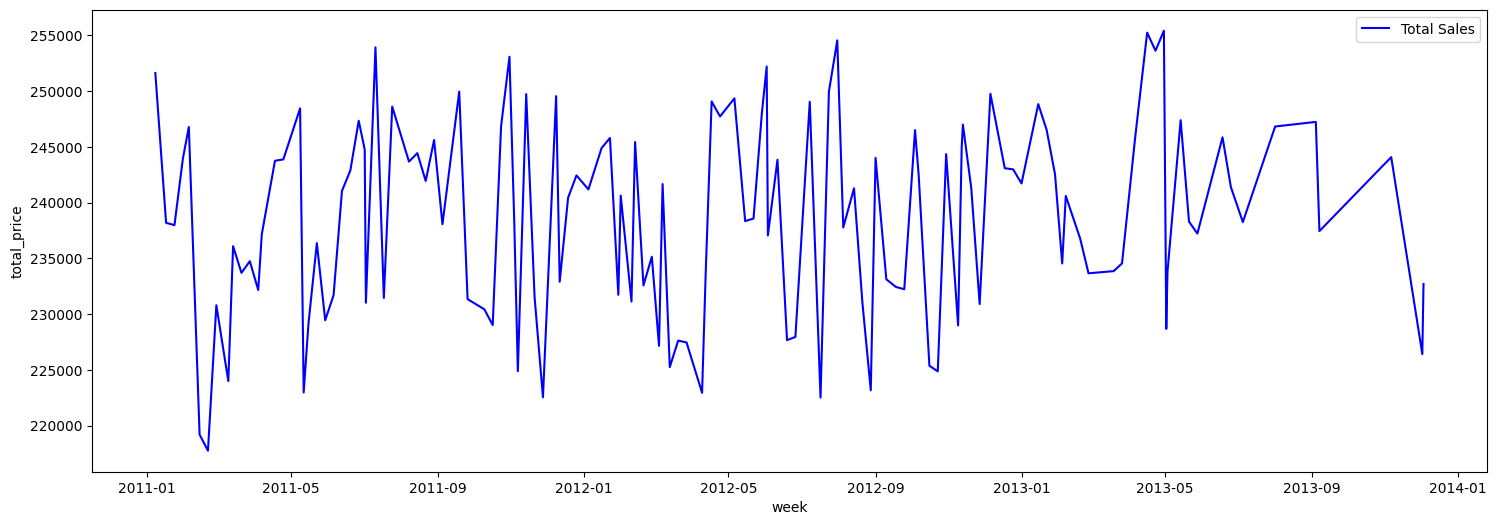

In [99]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='week', y='total_price', data=dgp, color='blue', label='Total Sales')

In [46]:
s = df[df['store_id'] == 8091]

In [51]:
s.head(10)

,week,store_id,total_price,base_price,units_sold
0,2011-01-17,8091,99.0375,111.8625,20
1,2011-01-17,8091,99.0375,99.0375,28
2,2011-01-17,8091,133.9500,133.9500,19
3,2011-01-17,8091,133.9500,133.9500,44
4,2011-01-17,8091,141.0750,141.0750,52
5,2011-01-17,8091,227.2875,227.2875,18
6,2011-01-17,8091,327.0375,327.0375,47
7,2011-01-17,8091,210.9000,210.9000,50
8,2011-01-17,8091,190.2375,234.4125,82
1155,2011-01-24,8091,99.0375,111.8625,34


In [63]:
result = s.groupby(['week'], as_index=False)['total_price'].sum()


<Axes: xlabel='week', ylabel='total_price'>

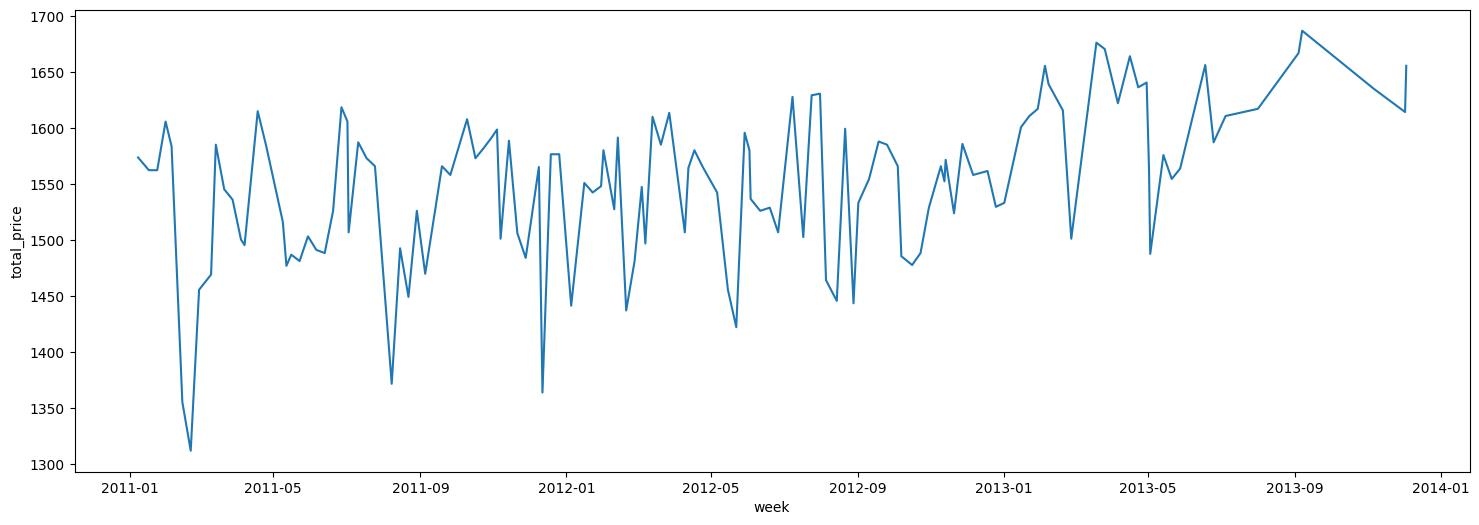

In [91]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='week', y='total_price', data=result)